In [18]:
# !pip install pytorch-tabnet
# !pip install torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### TabNet Classifier: Model Training and Evaluation

In [19]:
#test1
df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1)
X = df3.drop('Cardiovascular', axis=1)
y = df3['Cardiovascular']

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier(verbose=0)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Early stopping occurred at epoch 76 with best_epoch = 66 and best_val_0_auc = 0.91148
Accuracy: 0.8693
Precision: 0.7979
Recall: 0.6303


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [10]:
# 20-fold
# pipeline = make_pipeline(StandardScaler(), TabNetClassifier())
# cv_scores = cross_val_score(pipeline, X, y, cv=20, scoring='precision')
# print(f'Mean precision: {cv_scores.mean():.4f}')
# print(f'Standard Deviation: {cv_scores.std():.4f}')

### drow ROC


Early stopping occurred at epoch 76 with best_epoch = 66 and best_val_0_auc = 0.91148
Accuracy: 0.8693
Precision: 0.7979
Recall: 0.6303


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


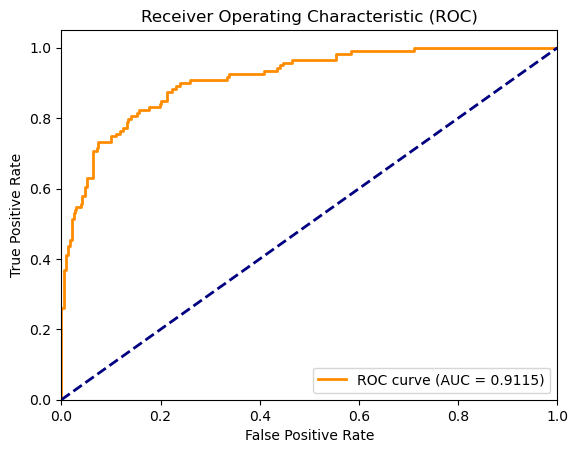

In [20]:
df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1) 
X = df3.drop('Cardiovascular', axis=1)  
y = df3['Cardiovascular']
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = TabNetClassifier(verbose=0)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Top 10 Feature Selection and TabNet Model Evaluation


Early stopping occurred at epoch 44 with best_epoch = 34 and best_val_0_auc = 0.89363
Accuracy: 0.8776
Precision: 0.8409
Recall: 0.6218


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


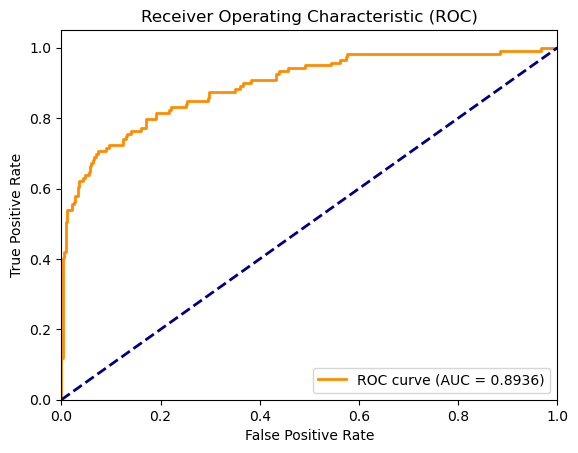

In [22]:
#select 10 best

df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1)  
X = df3.drop('Cardiovascular', axis=1)  
y = df3['Cardiovascular']  

X = X.to_numpy()
y = y.to_numpy()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)  
X_rfe = rfe.fit_transform(X, y)

selected_features = rfe.get_support(indices=True)
# print(f"Selected top 10 feature indices: {selected_features}")

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier(verbose=0)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Top 5 Feature Selection and TabNet Model Evaluation


Early stopping occurred at epoch 58 with best_epoch = 48 and best_val_0_auc = 0.91279
Accuracy: 0.8755
Precision: 0.8172
Recall: 0.6387


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


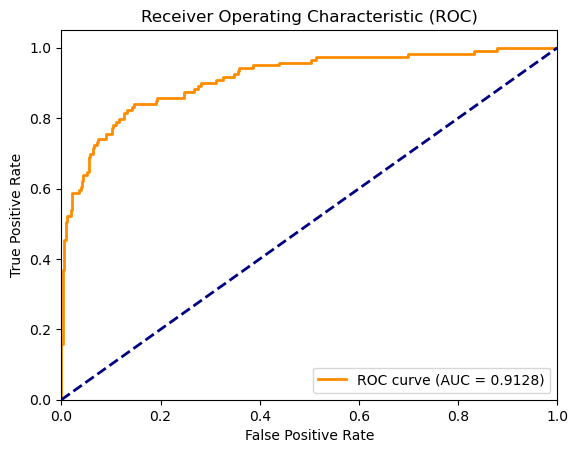

In [23]:
#select 5 best

df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1)  
X = df3.drop('Cardiovascular', axis=1)  
y = df3['Cardiovascular']  

X = X.to_numpy()
y = y.to_numpy()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)  
X_rfe = rfe.fit_transform(X, y)

selected_features = rfe.get_support(indices=True)
# print(f"Selected top 5 feature indices: {selected_features}")

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier(verbose=0)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### TabNet Feature Importance Selection

In [24]:
significant_vars = df3.drop('Cardiovascular', axis=1).columns
X = df3.drop('Cardiovascular', axis=1).values
y = df3['Cardiovascular'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tabnet_clf = TabNetClassifier(verbose=0)

tabnet_clf.fit(X_train, y_train, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)

feature_importances = tabnet_clf.feature_importances_

for i, var in enumerate(significant_vars):
    print(f"Feature: {var}, Importance: {feature_importances[i]}")

threshold = 0.05
significant_features = [significant_vars[i] for i in range(len(feature_importances)) if feature_importances[i] > threshold]

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Feature: LOS, Importance: 0.13938096757316137
Feature: ICU_ADMIN_FLAG, Importance: 0.0033025030734051075
Feature: HEIGHT, Importance: 0.017596596940530906
Feature: WEIGHT, Importance: 0.002491154951689862
Feature: SEX, Importance: 3.969070525624504e-05
Feature: ASA_RATING_C, Importance: 0.07138522810066426
Feature: Abnormal Flag, Importance: 0.003874710040429684
Feature: ORDER_STATUS_IMPACT, Importance: 0.0022291706592969785
Feature: discharge_risk_level, Importance: 0.0008728371344441112
Feature: BIRTH_DATE, Importance: 0.03498609993497909
Feature: PATIENT_CLASS_GROUP, Importance: 0.015442783230943741
Feature: PATIENT_CLASS_NM, Importance: 0.020927220445938435
Feature: systolic_peak, Importance: 0.030048424869012696
Feature: diastolic_peak, Importance: 0.005308129157197314
Feature: pulse_amplitude, Importance: 0.0005170980299809747
Feature: arc_peak_frequency, Importance: 0.004194546342111652
Feature: arc_spectral_energy, Importance: 0.010131787563695463
Feature: arc_bandwidth, Import

In [25]:
#the name of significant features
print(f"Selected significant features: {significant_features}")

Selected significant features: ['LOS', 'ASA_RATING_C', 'arc_bandwidth', 'vf_freq_power', 'Calcium', 'Erythrocyte distribution width']


### 20-fold Cross Validation with TabNet Classifier

In [26]:
#20-fold
scoring = ['precision', 'accuracy', 'recall']
X = df3[significant_features].values
y = df3['Cardiovascular'].values
pipeline = make_pipeline(StandardScaler(), TabNetClassifier(verbose=0))
cv_scores =cross_validate(pipeline, X, y, cv=20, scoring=scoring)
precision_mean = np.mean(cv_scores['test_precision'])
accuracy_mean = np.mean(cv_scores['test_accuracy'])
recall_mean = np.mean(cv_scores['test_recall'])

print(f"Average Precision: {precision_mean}")
print(f"Average Accuracy: {accuracy_mean}")
print(f"Average Recall: {recall_mean}")

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg

Average Precision: 0.6327521008403362
Average Accuracy: 0.854405864197531
Average Recall: 0.46928981278554477
